In [1]:
# install tensiometer
# install camb
# install getdist
# install cobaya
# install bilby

In [2]:
# initial imports:
import sys, os
import matplotlib.pyplot as plt

# getdist imports:
from getdist import plots, MCSamples

# tensiometer local imports:
here = os.path.dirname(os.getcwd())
tensiometer_path = os.path.join(here, 'tensiometer')
sys.path.append(tensiometer_path)

import tensiometer
print('Tensiometer version:', tensiometer.__version__)
print('Tensiometer path:', tensiometer.__path__)

Tensiometer version: 1.0.2
Tensiometer path: ['/Users/marco/Desktop/IW/ParametricModels/tensiometer/tensiometer']


In [3]:
# chains paths:

chains_dir = os.path.join('chains')

In [4]:
# getdist settings:

getdist_settings = {
    'smooth_scale_1D': 0.3,
    'smooth_scale_2D': 0.3,
    'boundary_correction_order': 1,
    'mult_bias_correction_order': 1,
    }

In [5]:
# import chain
from cobaya import load_samples

name = '04p1_LCDM_CMB_BAO_SN'
chain = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain.label = name
chain.updateSettings(getdist_settings)
chain.updateBaseStatistics()
chain.getConvergeTests()
print(chain.label+': R =', round(chain.GelmanRubin, 4))

04p1_LCDM_CMB_BAO_SN: R = 0.0085


In [6]:
chain.getParamNames().list()

['H0',
 'logA',
 'ns',
 'ombh2',
 'omch2',
 'tau',
 'A_planck',
 'P_act',
 'A',
 'As',
 'DHBBN',
 'YHe',
 'Y_p',
 'age',
 'clamp',
 'omega_de',
 'omegam',
 'omegamh2',
 'rdrag',
 's8h5',
 'S8',
 'S8_optimal',
 's8omegamp25',
 'sigma8',
 'thetastar',
 'zrei',
 'A_act',
 'chi2__BAO',
 'chi2__CMB',
 'chi2__SN',
 'minuslogprior',
 'minuslogprior__0',
 'chi2',
 'chi2__act_dr6_cmbonly.PlanckActCut',
 'chi2__act_dr6_cmbonly.ACTDR6CMBonly',
 'chi2__planck_2018_lowl.TT',
 'chi2__planck_2020_lollipop.lowlEB',
 'chi2__bao.desi_dr2.desi_bao_all',
 'chi2__sn.desy5']

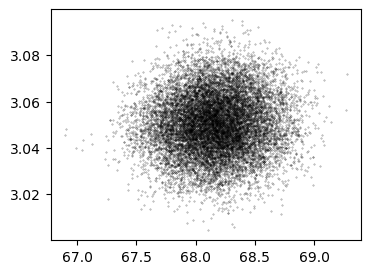

In [7]:
plt.figure(figsize=(4, 3))
plt.scatter(chain.samples[:, 0], chain.samples[:, 1], s=0.1, c='k', alpha=0.5)

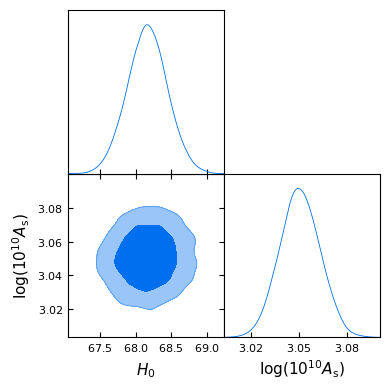

In [8]:
g = plots.get_subplot_plotter()
g.triangle_plot([chain], params=['H0','logA'], filled=True)

In [9]:
# rebuild the model:
from cobaya.model import get_model
import yaml

# define the path to the YAML parameters file:
yaml_params = os.path.join(chains_dir, name + '.input.yaml')
# load the parameters from the YAML file:
with open(yaml_params, 'r') as f:
    params_dict = yaml.safe_load(f)
# remove the 'path' key from the 'camb' dictionary if it exists:
if 'path' in params_dict.get('theory', {}).get('camb', {}):
    del params_dict['theory']['camb']['path']
if 'recombination_model' in params_dict.get('theory', {}).get('camb', {}).get('extra_args', {}):
    del params_dict['theory']['camb']['extra_args']['recombination_model']

# build the model:
model = get_model(params_dict)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']


INFO:camb:`camb` module loaded successfully from /Users/marco/Software/cobaya/code/CAMB/camb


[camb] `camb` module loaded successfully from /Users/marco/Software/cobaya/code/CAMB/camb


/Users/marco/Software/anaconda3/lib/python3.9/site-packages/sacc/sacc.py:935: UserWarning: The FITS format without the 'sacc_ordering' column is deprecated. Assuming data rows are in the correct order as it was before version 1.0.
  warnings.warn(
INFO:planck_2020_lollipop.lowleb:Initialized!


[planck_2020_lollipop.lowleb] Initialized!


INFO:bao.desi_dr2.desi_bao_all:Initialized.


[bao.desi_dr2.desi_bao_all] Initialized.


In [10]:
model.__dict__

{'log': <Logger model (INFO)>,
 '_updated_info': {'params': {'A': {'derived': 'lambda As: 1e9*As',
    'latex': '10^9 A_\\mathrm{s}'},
   'As': {'latex': 'A_\\mathrm{s}',
    'value': 'lambda logA: 1e-10*np.exp(logA)',
    'derived': True},
   'DHBBN': {'derived': 'lambda DH: 10**5*DH',
    'latex': '10^5 \\mathrm{D}/\\mathrm{H}'},
   'H0': {'latex': 'H_0',
    'prior': {'max': 100, 'min': 20},
    'proposal': 0.1,
    'ref': {'dist': 'norm', 'loc': 68, 'scale': 0.1}},
   'YHe': {'latex': 'Y_\\mathrm{P}',
    'derived': True,
    'renames': ['yheused', 'yhe']},
   'Y_p': {'latex': 'Y_P^\\mathrm{BBN}',
    'derived': True,
    'renames': ['YpBBN']},
   'age': {'latex': '{\\rm{Age}}/\\mathrm{Gyr}', 'derived': True},
   'clamp': {'derived': 'lambda As, tau: 1e9*As*np.exp(-2*tau)',
    'latex': '10^9 A_\\mathrm{s} e^{-2\\tau}'},
   'logA': {'drop': True,
    'latex': '\\log(10^{10} A_\\mathrm{s})',
    'prior': {'max': 3.91, 'min': 1.61},
    'proposal': 0.001,
    'ref': {'dist': 'norm', 

In [11]:
dir(model)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_params',
 '_chi2_names',
 '_component_order',
 '_dependencies',
 '_loglikes_input_params',
 '_must_provide',
 '_params_of_dependencies',
 '_set_component_order',
 '_set_dependencies_and_providers',
 '_to_sampled_array',
 '_unassigned_input',
 '_updated_info',
 'add_requirements',
 'check_blocking',
 'close',
 'components',
 'derived_params',
 'dump_timing',
 'get_auto_covmat',
 'get_param_blocking_for_sampler',
 'get_speeds',
 'get_valid_point',
 'get_versions',
 'info',
 'input_params',
 'is_debug',
 'is_debug_and_mpi_root',
 'likel